# Modeling and Simulation in Python

Chapter 4

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [38]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

## Returning values

Here's a simple function that returns a value:

In [39]:
def add_five(x):
    return x + 5

And here's how we call it.

In [40]:
y = add_five(3)

8

If you run a function on the last line of a cell, Jupyter displays the result:

In [41]:
add_five(5)

10

But that can be a bad habit, because usually if you call a function and don't assign the result in a variable, the result gets discarded.

In the following example, Jupyter shows the second result, but the first result just disappears.

In [42]:
add_five(3)
add_five(5)

10

When you call a function that returns a variable, it is generally a good idea to assign the result to a variable.

In [43]:
y1 = add_five(3)
y2 = add_five(5)

print(y1, y2)

8 10


**Exercise:** Write a function called `make_state` that creates a `State` object with the state variables `olin=10` and `wellesley=2`, and then returns the new `State` object.

Write a line of code that calls `make_state` and assigns the result to a variable named `init`.

In [44]:
# Solution goes here
def make_state():
    return State(olin=10, wellesley=2)

In [45]:
# Solution goes here
init=make_state()

olin         10
wellesley     2
Name: state, dtype: int64

## Running simulations

Here's the code from the previous notebook.

In [46]:
def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
        
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    if state.olin == 0:
        state.olin_empty += 1
        return
    state.olin -= 1
    state.wellesley += 1
    
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1
    
def decorate_bikeshare():
    """Add a title and label the axes."""
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)', 
             ylabel='Number of bikes')

Here's a modified version of `run_simulation` that creates a `State` object, runs the simulation, and returns the `State` object.

In [47]:
def run_simulation(p1, p2, num_steps):
    """Simulate the given number of time steps.
    
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    state = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0)
                    
    for i in range(num_steps):
        step(state, p1, p2)
        
    return state

Now `run_simulation` doesn't plot anything:

In [48]:
state = run_simulation(0.4, 0.2, 60)

olin                0
wellesley          12
olin_empty          2
wellesley_empty     0
Name: state, dtype: int64

But after the simulation, we can read the metrics from the `State` object.

In [49]:
state.olin_empty

2

Now we can run simulations with different values for the parameters.  When `p1` is small, we probably don't run out of bikes at Olin.

In [50]:
state = run_simulation(0.2, 0.2, 60)
state.olin_empty

0

When `p1` is large, we probably do.

In [51]:
state = run_simulation(0.6, 0.2, 60)
state.olin_empty

16

## More for loops

`linspace` creates a NumPy array of equally spaced numbers.

In [52]:
p1_array = linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

We can use an array in a `for` loop, like this:

In [53]:
for p1 in p1_array:
    print(p1)

0.0
0.25
0.5
0.75
1.0


This will come in handy in the next section.

`linspace` is defined in `modsim.py`.  You can get the documentation using `help`.

In [54]:
help(linspace)

Help on _ArrayFunctionDispatcher in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, s

`linspace` is based on a NumPy function with the same name.  [Click here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to read more about how to use it.

**Exercise:** 
Use `linspace` to make an array of 10 equally spaced numbers from 1 to 10 (including both).

In [55]:
# Solution goes here
linspace(1,10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

**Exercise:** The `modsim` library provides a related function called `linrange`.  You can view the documentation by running the following cell:

In [56]:
help(linrange)

Help on function linrange in module modsim.modsim:

linrange(start, stop=None, step=1)
    Make an array of equally spaced values.
    
    start: first value
    stop: last value (might be approximate)
    step: difference between elements (should be consistent)
    
    returns: NumPy array



Use `linrange` to make an array of numbers from 1 to 11 with a step size of 2.

In [57]:
# Solution goes here
linrange(1,11,2)

array([ 1.,  3.,  5.,  7.,  9., 11.])

## Sweeping parameters

`p1_array` contains a range of values for `p1`.

In [58]:
p2 = 0.2
num_steps = 60
p1_array = linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

The following loop runs a simulation for each value of `p1` in `p1_array`; after each simulation, it prints the number of unhappy customers at the Olin station:

In [59]:
for p1 in p1_array:
    state = run_simulation(p1, p2, num_steps)
    print(p1, state.olin_empty)

0.0 0
0.1 0
0.2 0
0.30000000000000004 0
0.4 0
0.5 11
0.6000000000000001 17
0.7000000000000001 13
0.8 28
0.9 32
1.0 32


Now we can do the same thing, but storing the results in a `SweepSeries` instead of printing them.



In [60]:
sweep = SweepSeries()

for p1 in p1_array:
    state = run_simulation(p1, p2, num_steps)
    sweep[p1] = state.olin_empty

And then we can plot the results.

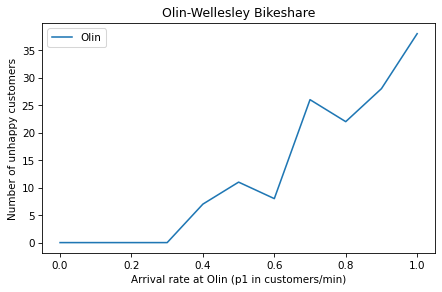

In [61]:
sweep.plot(label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Number of unhappy customers')

## Exercises

**Exercise:** Wrap this code in a function named `sweep_p1` that takes an array called `p1_array` as a parameter.  It should create a new `SweepSeries`, run a simulation for each value of `p1` in `p1_array`, store the results in the `SweepSeries`, and return the `SweepSeries`.

Use your function to plot the number of unhappy customers at Olin as a function of `p1`.  Label the axes.

In [62]:
# Solution goes here

def sweep_p1(p1_array):
    sweep = SweepSeries()

    for p1 in p1_array:
        state = run_simulation(p1, p2, num_steps)
        sweep[p1] = state.olin_empty
    
    sweep.plot(label='Olin')

    decorate(title='Olin-Wellesley Bikeshare',
            xlabel='Arrival rate at Olin (p1 in customers/min)', 
            ylabel='Number of unhappy customers')
    return sweep

Parameter
0.0     0
0.1     0
0.2     0
0.3     0
0.4     5
0.5    12
0.6    19
0.7    21
0.8    32
0.9    39
1.0    41
Name: Metric, dtype: int64

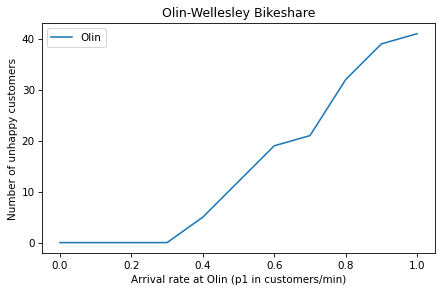

In [63]:
# Solution goes here
p1_array = linspace(0, 1, 11)
sweep_p1(p1_array)


**Exercise:** Write a function called `sweep_p2` that runs simulations with `p1=0.5` and a range of values for `p2`.  It should store the results in a `SweepSeries` and return the `SweepSeries`.


In [64]:
# Solution goes here
def sweep_p2(p2_array):
    sweep = SweepSeries()

    for p2 in p2_array:
        state = run_simulation(0.5, p2, num_steps)
        sweep[p2] = state.olin_empty
    
    sweep.plot(label='olin')

    decorate(title='Olin-Wellesley Bikeshare',
            xlabel='Arrival rate at Wellesley (p2 in customers/min)', 
            ylabel='Number of unhappy customers')
    return sweep

Parameter
0.0    22
0.1    15
0.2    14
0.3     3
0.4     0
0.5     0
0.6     0
0.7     0
0.8     0
0.9     0
1.0     0
Name: Metric, dtype: int64

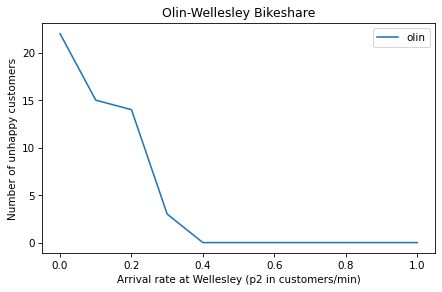

In [65]:
# Solution goes here
p2_array=linspace(0,1,11)
sweep_p2(p2_array)

## Optional Exercises

The following two exercises are a little more challenging.  If you are comfortable with what you have learned so far, you should give them a try.  If you feel like you have your hands full, you might want to skip them for now.

**Exercise:** Because our simulations are random, the results vary from one run to another, and the results of a parameter sweep tend to be noisy.  We can get a clearer picture of the relationship between a parameter and a metric by running multiple simulations with the same parameter and taking the average of the results.

Write a function called `run_multiple_simulations` that takes as parameters `p1`, `p2`, `num_steps`, and `num_runs`.

`num_runs` specifies how many times it should call `run_simulation`.

After each run, it should store the total number of unhappy customers (at Olin or Wellesley) in a `TimeSeries`.  At the end, it should return the `TimeSeries`.

Test your function with parameters

```
p1 = 0.3
p2 = 0.3
num_steps = 60
num_runs = 10
```

Display the resulting `TimeSeries` and use the `mean` function provided by the `TimeSeries` object to compute the average number of unhappy customers (see Section 2.7).

In [66]:
# Solution goes here

def run_multiple_simulation(p1, p2, num_steps, num_runs):
    results = TimeSeries()
    for n in range(num_runs):
        state = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0)
                    
        for i in range(num_steps):
            step(state, p1, p2)
        results[n]=state.olin_empty
    return results

In [67]:
# Solution goes here

res=run_multiple_simulation(0.3, 0.3, 60, 10)
print(res)
print(f'the mean of the timeseries results:{res.mean()}')


Time
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Quantity, dtype: int64
the mean of the timeseries results:0.0


**Exercise:**  Continuting the previous exercise, use `run_multiple_simulations` to run simulations with a range of values for `p1` and

```
p2 = 0.3
num_steps = 60
num_runs = 20
```

Store the results in a `SweepSeries`, then plot the average number of unhappy customers as a function of `p1`.  Label the axes.

What value of `p1` minimizes the average number of unhappy customers?

In [70]:
import numpy as np
# Solution goes here

sweep=SweepSeries()

for p1 in p1_array:
    
    results=run_multiple_simulation(p1,0.3,60,20)
    sweep[p1]=np.mean(results)

In [72]:
# Solution goes here
sweep


Parameter
0.0     0.00
0.1     0.00
0.2     0.00
0.3     0.10
0.4     0.75
0.5     4.15
0.6     9.25
0.7    15.00
0.8    19.20
0.9    26.35
1.0    32.55
Name: Metric, dtype: float64

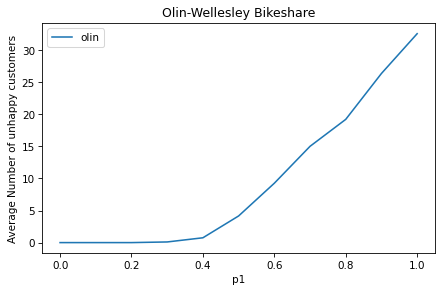

In [73]:
sweep.plot(label='olin')
decorate(title='Olin-Wellesley Bikeshare',
    xlabel='p1', 
    ylabel='Average Number of unhappy customers')

# The results & plots show p1=0.3 marks the cut off.